In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install arabic-reshaper
!pip install python-bidi
import pandas as pd
import numpy as np
import re
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pprint
from wordcloud import WordCloud , ImageColorGenerator
import arabic_reshaper
from nltk.probability import FreqDist
from bidi.algorithm import get_display
from IPython.display import Image
from PIL import Image 
plt.figure(figsize=(8,8));

In [ ]:

data = pd.read_csv(dirname + '/Sahih Bukhari Without_Tashkel.csv')
data.head()

In [ ]:
all_hadith = list(data['Sahih Bukhari Without_Tashkel'])

In [ ]:
for i in range(10,15):
    print(all_hadith[i])
    print('-'*50)

# EDA

### Most commen words in whole hadith "Mode"

In [ ]:
all_hadith_split_words = []
for each_h in all_hadith:
    for each_w in each_h.split():
        all_hadith_split_words.append(each_w)
        
temp = collections.Counter(all_hadith_split_words)
collections_of_word = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))
print(f'There are {len(collections_of_word)} unique word.')


In [ ]:
list(collections_of_word.items())[:10]

## How many عن in each hadith?


In [ ]:
splitting_words= ['عن' , 'حدثنا', 'سمعت']

In [ ]:
count = []
wordcount = 0
my_word="عن"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "عن"'))
plt.title(Ar_title);        

In [ ]:
count = []
wordcount = 0
my_word="حدثنا"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "حدثنا"'))
plt.title(Ar_title);

In [ ]:
count = []
wordcount = 0
my_word="سمعت"
for i in range(len(all_hadith)):
    wordcount = 0
    for word in all_hadith[i].split():
        if(my_word == word):
            wordcount +=1
        count.append(wordcount)

print(max(count), min(count))
sns.countplot(count)
Ar_title = get_display(arabic_reshaper.reshape('عدد تكرار كلمة "سمعت"'))
plt.title(Ar_title);

### Number of each word occurred in each hadith ['عن' , 'حدثنا', 'سمعت']

In [ ]:
count = []
my_word_1="عن"
my_word_2="حدثنا"
my_word_3="سمعت"
for i in range(len(all_hadith)):
    wordcount_1, wordcount_2, wordcount_3 = 0, 0 ,0, 
    for word in all_hadith[i].split():
        if(my_word_1 == word):
            wordcount_1 +=1
        elif(my_word_2 == word):
            wordcount_2 +=1
        elif(my_word_3 == word):
            wordcount_3 +=1
    count.append({"Hadith_num": i, "An": wordcount_1, "Hadathna": wordcount_2, "Samaat": wordcount_3}) 
count[:10] # ['عن , حدثنا , سمعنا']


## Some insights!
* Most of the Hadiths has a lot of عن, and some of the just حدثنا , and some mixed of حدثنا and عن , so:
    * if there is at least on "عن", split from after it till the end.
    * else, there will be at least one of حدثنا split after it till the end.
* But it didn't work well because there are a lot of "عن" in the context of hadith not just using for rwah, so i will split the hadith if i found one of this  two cases:
    * 1- if i foud " رسول الله " split from it.
    * 2- if i foud " النبى " split from it.
* if i found each case from the upove i will split from it and the previous part will be `Sanad` and the after one will be `Matn`.        
  

### Ther are differance between in `ي ى`
* "رسول الله صلي الله عليه وسلم"
* "رسول الله صلى الله عليه وسلم"

-----
* "النبي صلى الله عليه وسلم"
* "النبي صلى الله عليه وسلم"

* "رسول الله صلى الله عليه وسلم"

So we need to normalize **صلي** with **صلى**  


In [ ]:
def normalize(sentence):
    """
        replace all  صلي or النبي with صلى or النبى
    """
    sentence = re.sub("صلي", "صلى", sentence)
    sentence = re.sub("النبي", "النبى", sentence)
    return sentence

test_st = "قال رسول الله صلي الله عليه وسلم ، قال النبي صلى الله عليه وسلم"
print(test_st)
print(normalize(test_st))

In [ ]:
all_hadith_with_normalization = []
for hadith in all_hadith:
    all_hadith_with_normalization.append(normalize(hadith)) 


In [ ]:
all_hadith_split_words_normalized = []
for each_h in all_hadith_with_normalization:
    for each_w in each_h.split():
        all_hadith_split_words_normalized.append(each_w)
        
temp = collections.Counter(all_hadith_split_words_normalized)
collections_of_word_normalized = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))

print("\t***The Same Length Here***\t")
print(f"all summation of صلى is = {collections_of_word_normalized['صلى'] }")
print(f"all summation of النبى is = {collections_of_word_normalized['النبى'] }")

In [ ]:
# just for testing code

a = "رضي الله عنهما و رضي الله عنه سمعت عن فلا عن فلان قال"

all_matches = [(m.group(0), (m.start(), m.end()-1)) for m in re.finditer('عن', a)]
print(all_matches)
last_matche , last_indecies= zip(*all_matches)
first_index, last_index = last_indecies[-1][0], last_indecies[-1][1]
sanad = a[0:first_index]
matn = a[last_index+1:]

print(sanad)
print(matn)

### Here we have 690 not contain the ideicator of splited words!

searching_word_1 = " رسول الله "

searching_word_2 = " النبى "


In [ ]:
"""
    Here get all not work well hadith
"""

test_hadith = all_hadith_with_normalization
splited_hadiths = []
searching_word_1 = " رسول الله "
searching_word_2 = " النبى "
padding_word =" صلى الله عليه وسلم "
f1, f2 = 0 , 0
n_not = 0
hadith_not_work_well = []
for i, hadith in enumerate(test_hadith):
    st = ""
    st_1 = re.search(searching_word_1, hadith)
    st_2 = re.search(searching_word_2, hadith)
    if st_1 == None and st_2 == None:
        n_not +=1
        hadith_not_work_well.append(hadith)

print(n_not)    

In [ ]:
for i in range(10):
    print(hadith_not_work_well[i])
    print('-'*50)

In [ ]:
def splilt_hadith_book(data):
    """
        I will check if the hadith contain the exact search words
        if it conain:
            split it
        else:
            put whole hadith in sanad and matn
    """
    splited_hadiths = []
    searching_word_1 = " رسول الله "
    searching_word_2 = " النبى "
    padding_word = " صلى الله عليه وسلم "
    f1, f2 = 0 , 0
    n_not = 0

    for i, hadith in enumerate(data):
        st = ""
        st_1 = re.search(searching_word_1, hadith)
        st_2 = re.search(searching_word_2, hadith)
        # if hadith didn't containt specific spliting word/s
        if st_1 == None and st_2 == None:
            n_not +=1
            splited_hadiths.append({"sanad" : hadith,
                               "matn": hadith})
            continue

         # take the not None
        if st_1 == None:
            st = st_2 
            f2 = 1
        else:
            st = st_1
            f1 = 1
        sanad = hadith[ : st.start()] + (searching_word_2 if f2 else searching_word_1)  + padding_word

        matn = hadith[st.end()-1 + len(padding_word) : ]

        splited_hadiths.append({"sanad" : sanad,
                               "matn": matn})
    return splited_hadiths


In [ ]:
splited_hadiths = splilt_hadith_book(all_hadith_with_normalization)
for i in range(2):
    print(splited_hadiths[i])
    print('-'*50)

In [ ]:
print(f"The percentage of good RegEx work {round((len(splited_hadiths) - n_not)/ len(splited_hadiths),2) * 100}%")

### Most commen words in whole Matn

In [ ]:
all_bukhari_matn_, all_bukhari_matn_words = [], []

for hadith in splited_hadiths:
    all_bukhari_matn_.append(hadith['matn'])
#     all_bukhari_matn_words.append(hadith['matn'].split())
    for word in hadith['matn'].split():
        all_bukhari_matn_words.append(word)            

In [ ]:
temp = collections.Counter(all_bukhari_matn_words)
collections_of_word = dict(sorted(temp.items(), key=lambda item: item[1], reverse= True))
print(f'There are {len(collections_of_word)} unique word.')

In [ ]:
list(collections_of_word.items())[:10]

# Wordcloud for all matn

In [ ]:
print(len(all_bukhari_matn_), len(all_bukhari_matn_words))
list_for_wordcloud = " ".join(word for word in all_bukhari_matn_words ) 

In [ ]:
font_path = "../arial-bold.ttf"
image_path = "../bukhari_1.jpg"

In [ ]:
Image.open(image_path)

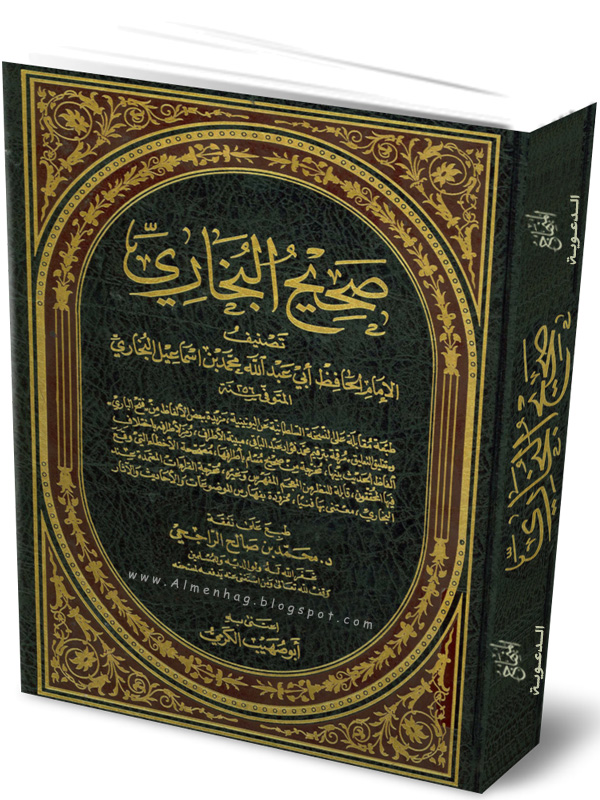

In [ ]:
# coustom image
mask = np.array(Image.open(image_path))

reshaped_text = arabic_reshaper.reshape(list_for_wordcloud)
artext = get_display(reshaped_text)

mask_colors = ImageColorGenerator(mask)

wc = WordCloud(font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=mask_colors)

plt.figure(figsize=(16, 12))
wc.generate(artext)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


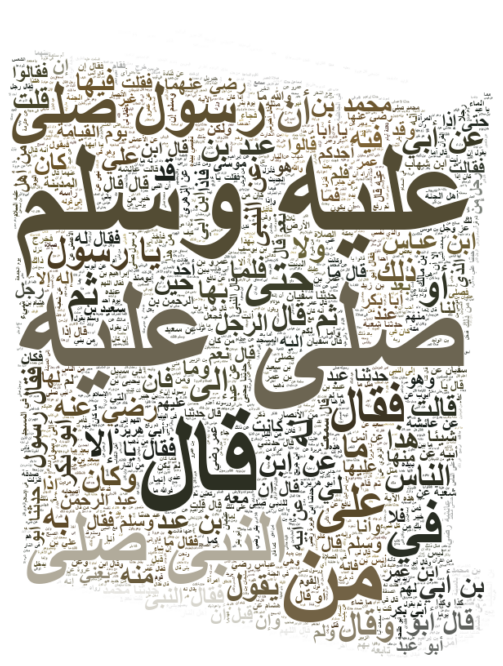